In [40]:
import numpy as np
import matplotlib.pyplot as plt


from skimage.transform import hough_circle, hough_circle_peaks
from skimage import feature, color, draw, transform 


In [74]:
def find_center_rings_hough(image, num_rings, rad_range, intensity_thresh, sigma, v_range = None, mute_graph = False):
    """
    Take angled cut or multiple incremented cuts of a image data.

    Parameters
    ----------
    image : ndarray
        Image data
    num_rings : int
        Number of candidate circles to be searched for
    rad_range : array
        The min, max, and increment for range of candidate radii to be searched
    intensity_thresh : array
        Min and max of intensity to be used in canny filter
    sigma : float
        Standard deviation applied in canny filter
    v_range : array
        Min and max for matplotlib colormap

    Returns
    -------
    center :list
        Center coordinates of candidate circles as (x,y) tuples
    radii: array
        radii of the candidate circles

    """

    low_thresh, hi_thresh = intensity_thresh
    sigma = sigma
    edges = feature.canny(image, sigma, low_threshold= low_thresh, high_threshold= hi_thresh)

    # Range of possible radii
    hough_radii = np.arange(*rad_range)
    hough_res = transform.hough_circle(edges, hough_radii)

    # Selects the most prominent circles, up to num_rings
    accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=num_rings)

    # Draw them
    if mute_graph == False:
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    Z = color.gray2rgb(image)

    centers =[]
    for center_y, center_x, radius in zip(cy, cx, radii):
        centers.append((center_x, center_y))
        if mute_graph == False:
            circy, circx = draw.circle_perimeter(center_y, center_x, radius,
                                        shape=Z.shape)
            ax.scatter(center_x, center_y, s =20, c = 'red')
            ax.scatter(x = circx,y =circy, s = 1, c = 'red')

    if mute_graph == False:
        if v_range != None:
            ax.imshow(image, cmap="viridis", vmin = v_range[0], vmax = v_range[1])
        else:
            ax.imshow(image, cmap="viridis")
    plt.show()
    return centers, radii

## Ex 1:

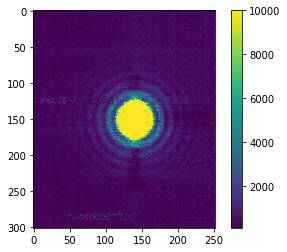

In [117]:
Z1 = np.load("rough_signal.npy")
fig, ax = plt.subplots()
im = plt.imshow(Z, vmin  = .01e4, vmax = 1e4)
cbar = fig.colorbar(im)

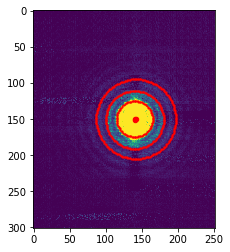

In [77]:
centers1, rad1 = find_center_rings_hough(Z, num_rings = 3, rad_range = [20, 100, 5], intensity_thresh = [30, 900], sigma = 3, v_range = [.01e4,1e4], mute_graph = False) 

## Ex 2:
#### Hough transform also applies to incomplete circles, the parameters allow for a wide range of manipulation to select for positioning of circles

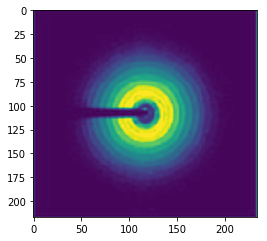

In [137]:
from PIL import Image

im_frame = Image.open('incomplete_circle.png').convert("L")
np_frame = np.array(im_frame)
Z2 = np_frame[5:, :]

fig, ax = plt.subplots(1,figsize=(4,4))
im = ax.imshow(Z2, vmin = 20, vmax = 224, cmap = "viridis")#cmap='inferno')

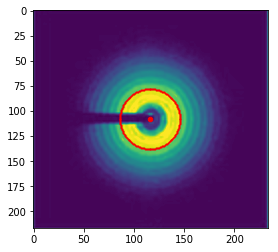

In [138]:
centers2, rad2 = find_center_rings_hough(image = Z2, num_rings = 1, rad_range = [30, 70, 2], intensity_thresh = [150, 200], sigma = .1, v_range = [20, 224], mute_graph = False)

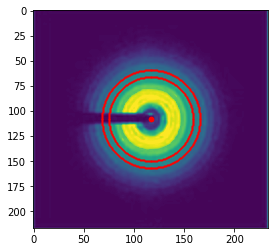

In [139]:
centers2, rad2 = find_center_rings_hough(image = Z2, num_rings = 2, rad_range = [40, 70, 1], intensity_thresh = [30, 100], sigma = .1, v_range = [20, 224], mute_graph = False)